In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
import os

# Getting the data

Dataset download link: https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data

In [2]:
#reading dataset using numpy
df = pd.read_csv("laptop_price.csv", encoding='latin1') 

# Take a Quick Look at the Data Structure

In [3]:
#Reading first 5 records of data
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Number of rows and columns
df.shape

(1303, 13)

In [5]:
# info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [7]:
# Statistical description of numerical data
numeric_df= df.select_dtypes(include=['int64', 'float64'])  
numeric_df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
# Statistical description of categorical data
categorical_df= df.select_dtypes(include=['object'])  
categorical_df.describe()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


# Data Preprocessing

# 1- Data Cleaning

In [9]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
df.shape

(1303, 13)

In [11]:
# Number of null values in each column
df.isnull().sum()


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [12]:
#removing dups

def remove_dups(df):
    dups = df.duplicated().sum()
    if(dups):
        print(f'duplicated values: {df.duplicated().sum()}')
        df = df.drop_duplicates(inplace= True)
    else:
        print(f'There is 0 duplicates')
    return df

remove_dups(df)

There is 0 duplicates


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [13]:
df.shape

(1303, 13)

# 2-Feauture Engineering

In [14]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [15]:
def extract_cpu_info(cpu_string):
    parts_cpu = cpu_string.split()
    
    cpu_company=parts_cpu[0]
    cpu = ' '.join(parts_cpu[1:-1])  
    frequency = parts_cpu[-1].replace('GHz', '')  

    
    try:
        frequency = float(frequency)
    except ValueError:
        frequency = None  

    return pd.Series([  cpu_company,cpu, frequency])
df[['Cpu_Company','Cpu_Type', 'Cpu_Freq(GHz)']] = df['Cpu'].apply(extract_cpu_info)


In [16]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Cpu_Type,Cpu_Freq(GHz)
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,Core i5,3.1


In [17]:
df["Cpu_Type"].unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i7 6920HQ', 'Core i5 7Y54', 'Core i7 7820HK',
       'Xeon E3-1505M V6', 'Core i7 6500U', 'E-Series 9000e',
       'A10-Series A10-9620P', 'A6-Series A6-9220', 'Core i7 6600U',
       'Celeron Dual Core 3205U', 'Core i7 7820HQ', 'A10-Series 9600P',
       'Core i7 7600U', 'A8-Series 7410', 'Celeron Dual Core 3855U',
       'Pentium Quad Core N3710', 'A12-Series 9720P', 'Core i5 7300U',
       'Ce

In [18]:
df["Cpu_Type"].value_counts()

Cpu_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       135
Core i3 6006U        81
Core i7 8550U        73
                   ... 
FX 9830P              1
Core i5 6440HQ        1
E-Series E2-6110      1
Ryzen 1600            1
Core i7 6920HQ        1
Name: count, Length: 93, dtype: int64

In [19]:
df["Cpu_Company"].value_counts()

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [20]:
df[df['Cpu_Company']=='Samsung']

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Cpu_Type,Cpu_Freq(GHz)
1191,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,Samsung,Cortex A72&A53,2.0


In [21]:
df=df.drop(1191)

In [22]:
df[df['Cpu_Company']=='Samsung']

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Cpu_Type,Cpu_Freq(GHz)


In [23]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [24]:
# Define a function to extract the GPU information
def extract_GPU_info(df):
  df['Gpu_company'] = df['Gpu'].str.extract(r'^(\w+)')
  df['Gpu_Type']= df['Gpu'].str.replace(r'^(\w+)', '', regex=True)
  df.drop(columns=['Gpu'], inplace=True)
  return df
  
  
df = extract_GPU_info(df)

In [25]:
df["Gpu_company"].value_counts()

Gpu_company
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [26]:
df["Gpu_Type"].value_counts()

Gpu_Type
HD Graphics 620     281
HD Graphics 520     185
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
                   ... 
Graphics 620          1
Radeon R5 520         1
Radeon R7             1
HD Graphics 540       1
GeForce 960M          1
Name: count, Length: 109, dtype: int64

In [27]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Gpu_company,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69,Intel,Core i5,2.3,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94,Intel,Core i5,1.8,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45,Intel,Core i7,2.7,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60,Intel,Core i5,3.1,Intel,Iris Plus Graphics 650


In [28]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [29]:
def extract_Memory_info(Memory_string):
    parts_memory = Memory_string.split('+')
    
    First_memory = parts_memory[0]
    
    if len(parts_memory) > 1:
        Second_memory = parts_memory[1].strip()
    else:
        Second_memory =  np.nan 
    return pd.Series([First_memory, Second_memory])


df[['First_memory', 'Second_memory']] = df['Memory'].apply(extract_Memory_info)

In [30]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,OpSys,Weight,Price_euros,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Gpu_company,Gpu_Type,First_memory,Second_memory
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69,Intel,Core i5,2.3,Intel,Iris Plus Graphics 640,128GB SSD,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94,Intel,Core i5,1.8,Intel,HD Graphics 6000,128GB Flash Storage,NaN
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,256GB SSD,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45,Intel,Core i7,2.7,AMD,Radeon Pro 455,512GB SSD,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60,Intel,Core i5,3.1,Intel,Iris Plus Graphics 650,256GB SSD,NaN


In [31]:
new_order = ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
             'Cpu_Company', 'Cpu_Type', 'Cpu_Freq(GHz)', 'Ram', 'First_memory','Second_memory',
             'Gpu_company','Gpu_Type', 'OpSys', 'Weight','Price_euros']
df = df[new_order]
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Ram,First_memory,Second_memory,Gpu_company,Gpu_Type,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8GB,128GB SSD,NaN,Intel,Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8GB,128GB Flash Storage,NaN,Intel,HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8GB,256GB SSD,NaN,Intel,HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16GB,512GB SSD,NaN,AMD,Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8GB,256GB SSD,NaN,Intel,Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [32]:
df['First_memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD ', '256GB SSD ',
       '64GB Flash Storage', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD ', '1TB SSD', '16GB SSD',
       '16GB Flash Storage', '64GB Flash Storage ', '180GB SSD',
       '1TB HDD ', '32GB HDD', '1TB SSD ', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD'],
      dtype=object)

In [33]:
df['Second_memory'].unique()

array([nan, '1TB HDD', '256GB SSD', '2TB HDD', '500GB HDD', '512GB SSD',
       '1.0TB Hybrid'], dtype=object)

In [34]:
def extract_fMemory_info(fMemory_string):
    fparts_memory = fMemory_string.split()
    
    First_memory_volume = fparts_memory[0]
    First_memory_type = ' '.join(fparts_memory[1:])
    return pd.Series([First_memory_volume, First_memory_type])

df[['First_memory_volume', 'First_memory_type']] = df['First_memory'].apply(extract_fMemory_info)

def extract_SMemory_info(SMemory_string):
    if pd.isna(SMemory_string):
        return pd.Series([np.nan, np.nan])  

    Sparts_memory = SMemory_string.split()
    Second_memory_volume = Sparts_memory[0]
    Second_memory_type = ' '.join(Sparts_memory[1:])
    return pd.Series([Second_memory_volume, Second_memory_type])
df[['Second_memory_volume', 'Second_memory_type']] = df['Second_memory'].apply(extract_SMemory_info)


In [35]:
new_order = ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
             'Cpu_Company', 'Cpu_Type', 'Cpu_Freq(GHz)', 'Ram', 'First_memory_volume','First_memory_type','Second_memory_volume',
            'Second_memory_type', 'Gpu_company','Gpu_Type', 'OpSys', 'Weight','Price_euros']
df = df[new_order]
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Ram,First_memory_volume,First_memory_type,Second_memory_volume,Second_memory_type,Gpu_company,Gpu_Type,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8GB,128GB,SSD,NaN,NaN,Intel,Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8GB,128GB,Flash Storage,NaN,NaN,Intel,HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8GB,256GB,SSD,NaN,NaN,Intel,HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16GB,512GB,SSD,NaN,NaN,AMD,Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8GB,256GB,SSD,NaN,NaN,Intel,Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   laptop_ID             1302 non-null   int64  
 1   Company               1302 non-null   object 
 2   Product               1302 non-null   object 
 3   TypeName              1302 non-null   object 
 4   Inches                1302 non-null   float64
 5   ScreenResolution      1302 non-null   object 
 6   Cpu_Company           1302 non-null   object 
 7   Cpu_Type              1302 non-null   object 
 8   Cpu_Freq(GHz)         1302 non-null   float64
 9   Ram                   1302 non-null   object 
 10  First_memory_volume   1302 non-null   object 
 11  First_memory_type     1302 non-null   object 
 12  Second_memory_volume  208 non-null    object 
 13  Second_memory_type    208 non-null    object 
 14  Gpu_company           1302 non-null   object 
 15  Gpu_Type              1302

In [37]:
df['Second_memory_volume'].unique()

array([nan, '1TB', '256GB', '2TB', '500GB', '512GB', '1.0TB'],
      dtype=object)

In [38]:
df['Second_memory_type'].unique()

array([nan, 'HDD', 'SSD', 'Hybrid'], dtype=object)

In [39]:
df['Second_memory_type'].isnull().sum()

1094

-Due to the high number of missing values because not all laptops have a secondary hard drive, We will be dropping this column

In [40]:
df.drop(columns = ['Second_memory_type'], inplace = True)

In [41]:
def convert_to_gb1(First_memory_value):
    if 'TB' in First_memory_value:
        return float(First_memory_value.replace('TB', '').strip()) * 1024 
    if 'GB' in First_memory_value:
        return float(First_memory_value.replace('GB', '').strip())
    return None 
    
def convert_to_gb2(Second_memory_value):
    if  pd.isna(Second_memory_value):
        return 0.0
    if 'TB' in Second_memory_value:
        return float(Second_memory_value.replace('TB', '').strip()) * 1024  
    if 'GB' in Second_memory_value:
        return float(Second_memory_value.replace('GB', '').strip())  
    return None  

df['First_memory_volume'] = df['First_memory_volume'].apply(convert_to_gb1)
df['Second_memory_volume'] = df['Second_memory_volume'].apply(convert_to_gb2)
df.rename(columns={ 'First_memory_volume' :'First_memory_volume(GB)', 'Second_memory_volume' :'Second_memory_volume(GB)'}, inplace=True)

In [42]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Ram,First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8GB,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8GB,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8GB,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16GB,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8GB,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   laptop_ID                 1302 non-null   int64  
 1   Company                   1302 non-null   object 
 2   Product                   1302 non-null   object 
 3   TypeName                  1302 non-null   object 
 4   Inches                    1302 non-null   float64
 5   ScreenResolution          1302 non-null   object 
 6   Cpu_Company               1302 non-null   object 
 7   Cpu_Type                  1302 non-null   object 
 8   Cpu_Freq(GHz)             1302 non-null   float64
 9   Ram                       1302 non-null   object 
 10  First_memory_volume(GB)   1302 non-null   float64
 11  First_memory_type         1302 non-null   object 
 12  Second_memory_volume(GB)  1302 non-null   float64
 13  Gpu_company               1302 non-null   object 
 14  Gpu_Type     

In [44]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [45]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Ram,First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8GB,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8GB,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8GB,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16GB,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8GB,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [46]:
#  extract the screen information

def extract_screen_information(df):
  df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
  df['Screentype'] = df['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
  df['Screentype'] = df['Screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
  df['Touchscreen'] = df['Screentype'].str.extract(r'(Touchscreen)')
  df['Screentype'] = df['Screentype'].replace(r'(Touchscreen)','',regex=True)
  df['Touchscreen'] = df['Touchscreen'].replace('Touchscreen',1)
  df['Touchscreen'] = df['Touchscreen'].replace(np.nan,0)
  df['Screentype']=df['Screentype'].replace(r' ','',regex=True)
  df['Screentype'] = df['Screentype'].replace(r'^\s*$', np.nan, regex=True)
  df = df.drop('ScreenResolution', axis=1)
  
  #move label feature to the end
  df = df[[col for col in df.columns if col != 'Price_euros'] + ['Price_euros']]

  return df
df = extract_screen_information(df)

C:\Users\USER\AppData\Local\Temp\ipykernel_1052\4098764970.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Touchscreen'] = df['Touchscreen'].replace('Touchscreen',1)


In [47]:
df['Screentype'].isnull().sum()

938

-Due to the high number of missing values because not all laptops include their screen type, We will be dropping this column

In [48]:
df.drop(columns = ['Screentype'], inplace = True)

In [49]:
df['Resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [50]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),Ram,First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight,Resolution,Touchscreen,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8GB,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37kg,2560x1600,0.0,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8GB,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34kg,1440x900,0.0,898.94
2,3,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8GB,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86kg,1920x1080,0.0,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16GB,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83kg,2880x1800,0.0,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8GB,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37kg,2560x1600,0.0,1803.60


In [51]:
#turning Ram & Weight columns into numerical values

def extract_ram_weight_information(df):
  df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
  df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
  df.rename(columns={'Ram': 'RAM(GB)' , 'Weight': 'Weight(kg)'},inplace=True)
  return df
df=extract_ram_weight_information(df)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),RAM(GB),First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight(kg),Resolution,Touchscreen,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37,2560x1600,0.0,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34,1440x900,0.0,898.94
2,3,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86,1920x1080,0.0,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83,2880x1800,0.0,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37,2560x1600,0.0,1803.60


In [52]:
df['laptop_ID']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_ID, Length: 1302, dtype: int64

The laptop_id doesn't correctly represent the order of laptop in df,  We can use pandas index instead so we will drop it


In [53]:
df.drop(columns=['laptop_ID'], inplace=True)
df.head()

,Company,Product,TypeName,Inches,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),RAM(GB),First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight(kg),Resolution,Touchscreen,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,2.3,8,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37,2560x1600,0.0,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,Intel,Core i5,1.8,8,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34,1440x900,0.0,898.94
2,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,8,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86,1920x1080,0.0,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,Intel,Core i7,2.7,16,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83,2880x1800,0.0,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,Intel,Core i5,3.1,8,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37,2560x1600,0.0,1803.60


In [54]:
df['Product'].value_counts()

Product
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: count, Length: 617, dtype: int64

The Product contains an excessively large number of values, The model won't get many insights from the feature.

In [55]:
df.drop(columns=['Product'], inplace=True)
df.head()

,Company,TypeName,Inches,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),RAM(GB),First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight(kg),Resolution,Touchscreen,Price_euros
0,Apple,Ultrabook,13.3,Intel,Core i5,2.3,8,128.0,SSD,0.0,Intel,Iris Plus Graphics 640,macOS,1.37,2560x1600,0.0,1339.69
1,Apple,Ultrabook,13.3,Intel,Core i5,1.8,8,128.0,Flash Storage,0.0,Intel,HD Graphics 6000,macOS,1.34,1440x900,0.0,898.94
2,HP,Notebook,15.6,Intel,Core i5 7200U,2.5,8,256.0,SSD,0.0,Intel,HD Graphics 620,No OS,1.86,1920x1080,0.0,575.00
3,Apple,Ultrabook,15.4,Intel,Core i7,2.7,16,512.0,SSD,0.0,AMD,Radeon Pro 455,macOS,1.83,2880x1800,0.0,2537.45
4,Apple,Ultrabook,13.3,Intel,Core i5,3.1,8,256.0,SSD,0.0,Intel,Iris Plus Graphics 650,macOS,1.37,2560x1600,0.0,1803.60


# spiltting the data


In [56]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)
df = train_set.copy()

In [57]:
print(len(train_set))
print(len(test_set))

1041
261


# 3- Visualization and finding correlations

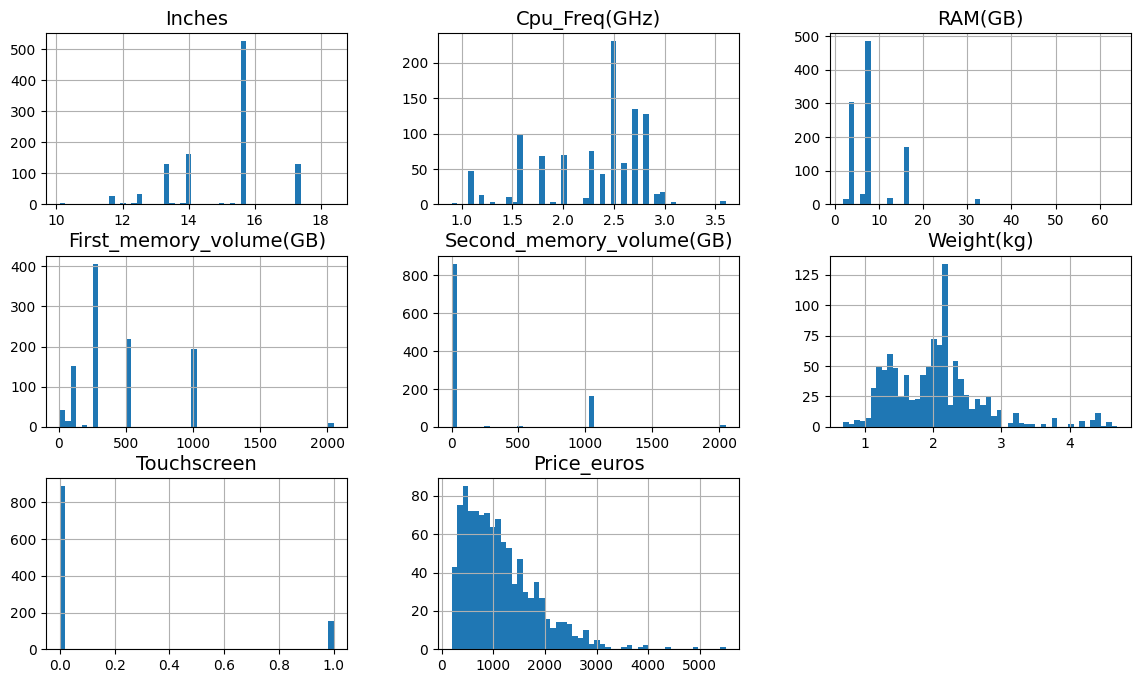

In [58]:
# simple histogram graph for better understanding to the data

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(14, 8))
plt.show()

In [59]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope,intercept

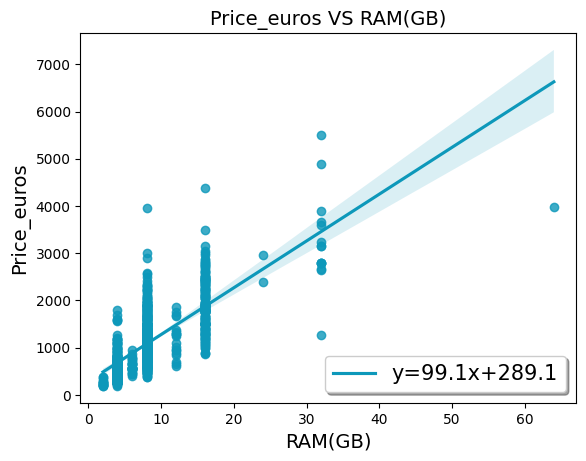

In [60]:
slope, intercept = lr_plot(df,'RAM(GB)','Price_euros', 'lower right')

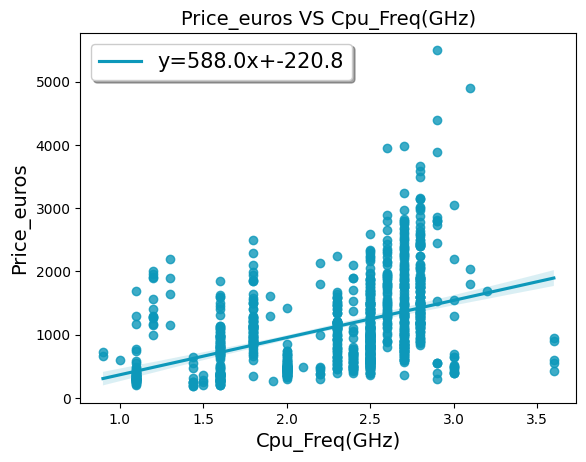

In [61]:
slope, intercept = lr_plot(df,'Cpu_Freq(GHz)','Price_euros', 'upper left')

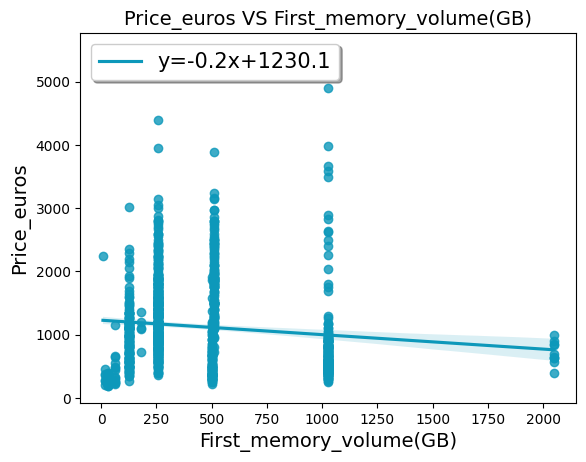

In [62]:
slope, intercept = lr_plot(df,'First_memory_volume(GB)','Price_euros', 'upper left')

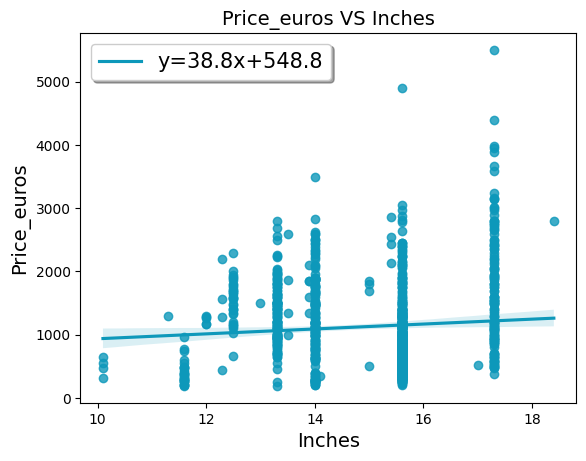

In [63]:
slope, intercept = lr_plot(df,'Inches','Price_euros', 'upper left')

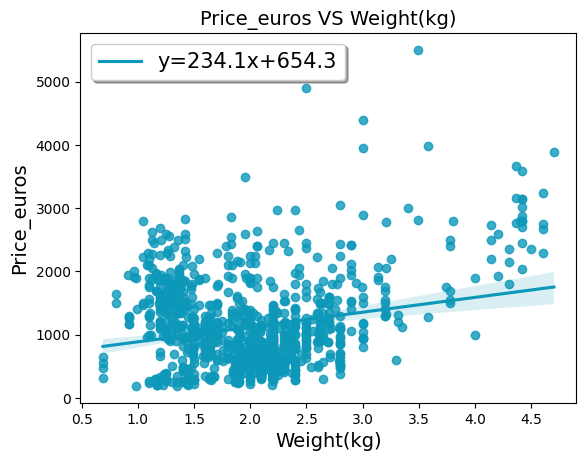

In [64]:
slope, intercept = lr_plot(df,'Weight(kg)','Price_euros', 'upper left')

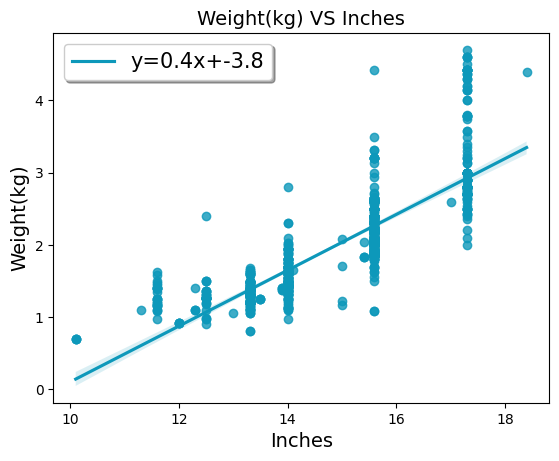

In [65]:
slope, intercept = lr_plot(df,'Inches','Weight(kg)','upper left')

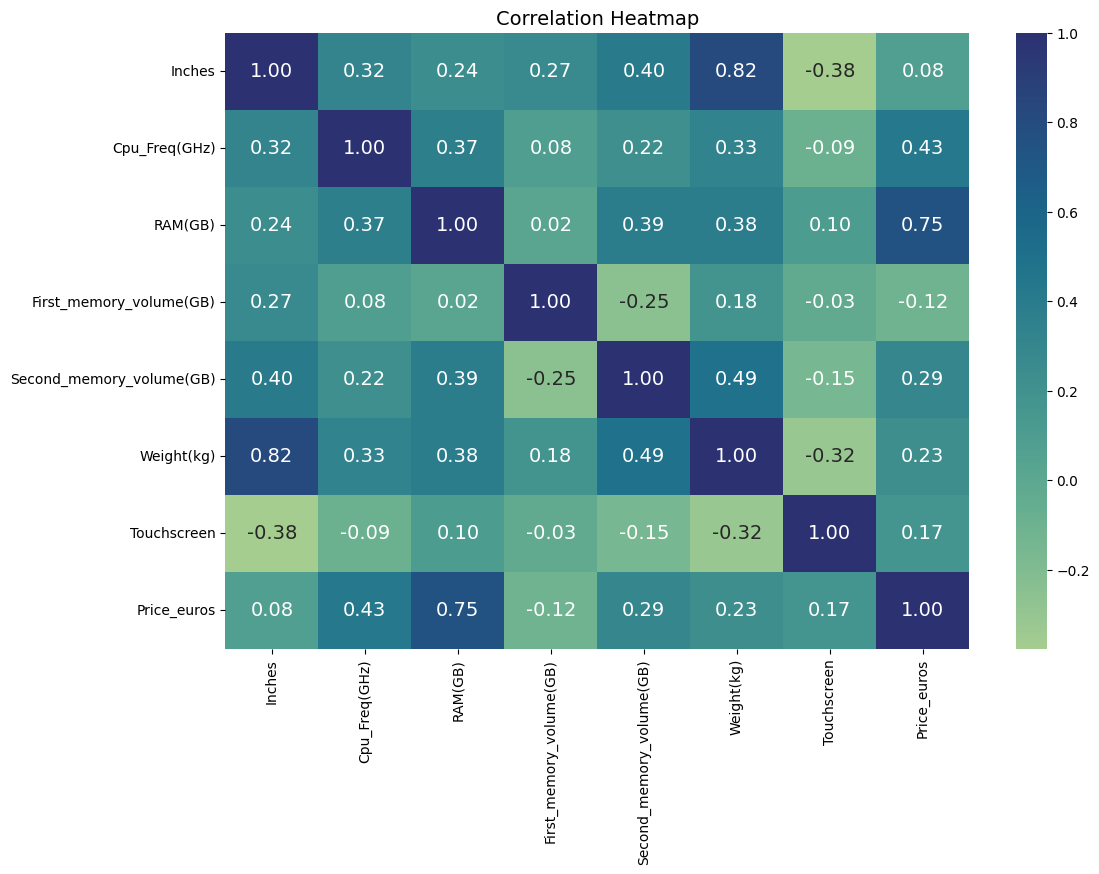

In [66]:
# Specify only numeric columns
numerical_cols = df.select_dtypes(include=['number'])

# Correlation coefficient
correlation_matrix = numerical_cols.corr()

# heatmap to see the relationships.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We will drop the inches feature due to the high correlation coefficient and high positive linearity between it and the weight and the non linear relation between inches feature and the price 

In [67]:
train_set.drop(columns=['Inches'], inplace=True)
test_set.drop(columns=['Inches'], inplace=True)
train_set.head()


,Company,TypeName,Cpu_Company,Cpu_Type,Cpu_Freq(GHz),RAM(GB),First_memory_volume(GB),First_memory_type,Second_memory_volume(GB),Gpu_company,Gpu_Type,OpSys,Weight(kg),Resolution,Touchscreen,Price_euros
147,Asus,Notebook,Intel,Celeron Dual Core N3350,1.1,4,1024.0,HDD,0.0,Intel,HD Graphics 500,Windows 10,2.00,1920x1080,0.0,344.00
342,HP,Notebook,Intel,Core i3 7100U,2.4,8,1024.0,HDD,0.0,Nvidia,GeForce 930MX,Windows 10,2.10,1920x1080,0.0,716.00
1003,HP,Notebook,Intel,Core i5 7200U,2.5,4,500.0,HDD,0.0,Intel,HD Graphics 620,Windows 10,1.64,1366x768,0.0,779.00
814,Dell,Notebook,Intel,Core i5 7200U,2.5,8,256.0,SSD,0.0,AMD,Radeon R5 M420,Windows 10,2.18,1920x1080,0.0,789.81
344,Dell,Ultrabook,Intel,Core i7 8550U,1.8,8,256.0,SSD,0.0,Intel,UHD Graphics 620,Windows 10,1.20,1920x1080,0.0,1579.00


# 4- Transforming the price label due to the skewness seen earlier

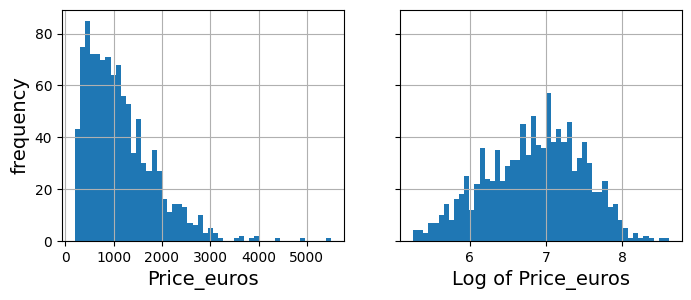

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["Price_euros"].hist(ax=axs[0], bins=50)
df["Price_euros"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Price_euros")
axs[1].set_xlabel("Log of Price_euros")
axs[0].set_ylabel("frequency")
plt.show()

In [69]:
from sklearn.preprocessing import FunctionTransformer
X_train = train_set.drop("Price_euros", axis=1)
y_train = train_set["Price_euros"]
X_test = test_set.drop("Price_euros", axis=1)
y_test = test_set["Price_euros"]

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
y_train= log_transformer.transform(train_set[["Price_euros"]])
y_test= log_transformer.transform(test_set[["Price_euros"]])


# 5- Transformation pipeline (encoding and feature scaling)


In [70]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

#define features
numerical_features = ['Cpu_Freq(GHz)', 'RAM(GB)', 'First_memory_volume(GB)', 'Second_memory_volume(GB)', 'Weight(kg)', 'Touchscreen']
categorical_features = ['Company', 'TypeName', 'Cpu_Company','Cpu_Type','First_memory_type', 'Gpu_company','Gpu_Type','OpSys', 'Resolution']

#define a numerical transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#define a categorical transformer
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())
])

#Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#transform the train and test set
x_train_preprocessed = preprocessor.fit_transform(X_train)
x_test_preprocessed = preprocessor.transform(X_test)

df_pre = pd.DataFrame(x_train_preprocessed)
df_pre.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.353117,-0.854284,1.655773,-0.439609,-0.049434,-0.415087,-1.101002,0.333723,0.22225,-1.605121,-1.200966,-0.243945,-0.186900,0.172199,-0.027677
1,0.201287,-0.093540,1.655773,-0.439609,0.098540,-0.415087,0.125082,0.333723,0.22225,-0.699435,-1.200966,1.304511,-1.474599,0.172199,-0.027677
2,0.397780,-0.854284,0.176741,-0.439609,-0.582143,-0.415087,0.125082,0.333723,0.22225,-0.216402,-1.200966,-0.243945,0.215506,0.172199,-0.998853
3,0.397780,-0.093540,-0.511969,-0.439609,0.216920,-0.415087,-0.610568,0.333723,0.22225,-0.216402,0.704835,-1.792401,1.543445,0.172199,-0.027677
4,-0.977669,-0.093540,-0.511969,-0.439609,-1.233232,-0.415087,-0.610568,1.145417,0.22225,1.232696,0.704835,-0.243945,2.147054,0.172199,-0.027677


In [71]:
# extra code – shows that we can get a DataFrame out if we want
x_train_preprocessed_df = pd.DataFrame(
   x_train_preprocessed,
    columns=preprocessor.get_feature_names_out(),
    index=X_train.index)
x_train_preprocessed_df['Price_euros'] = y_train.values  
x_train_preprocessed_df.head()

,num__Cpu_Freq(GHz),num__RAM(GB),num__First_memory_volume(GB),num__Second_memory_volume(GB),num__Weight(kg),num__Touchscreen,cat__Company,cat__TypeName,cat__Cpu_Company,cat__Cpu_Type,cat__First_memory_type,cat__Gpu_company,cat__Gpu_Type,cat__OpSys,cat__Resolution,Price_euros
147,-2.353117,-0.854284,1.655773,-0.439609,-0.049434,-0.415087,-1.101002,0.333723,0.22225,-1.605121,-1.200966,-0.243945,-0.186900,0.172199,-0.027677,5.840642
342,0.201287,-0.093540,1.655773,-0.439609,0.098540,-0.415087,0.125082,0.333723,0.22225,-0.699435,-1.200966,1.304511,-1.474599,0.172199,-0.027677,6.573680
1003,0.397780,-0.854284,0.176741,-0.439609,-0.582143,-0.415087,0.125082,0.333723,0.22225,-0.216402,-1.200966,-0.243945,0.215506,0.172199,-0.998853,6.658011
814,0.397780,-0.093540,-0.511969,-0.439609,0.216920,-0.415087,-0.610568,0.333723,0.22225,-0.216402,0.704835,-1.792401,1.543445,0.172199,-0.027677,6.671792
344,-0.977669,-0.093540,-0.511969,-0.439609,-1.233232,-0.415087,-0.610568,1.145417,0.22225,1.232696,0.704835,-0.243945,2.147054,0.172199,-0.027677,7.364547


# Correlation_Matrix after Encoding and scaling

Correlation_Matrix after Encoding and scaling

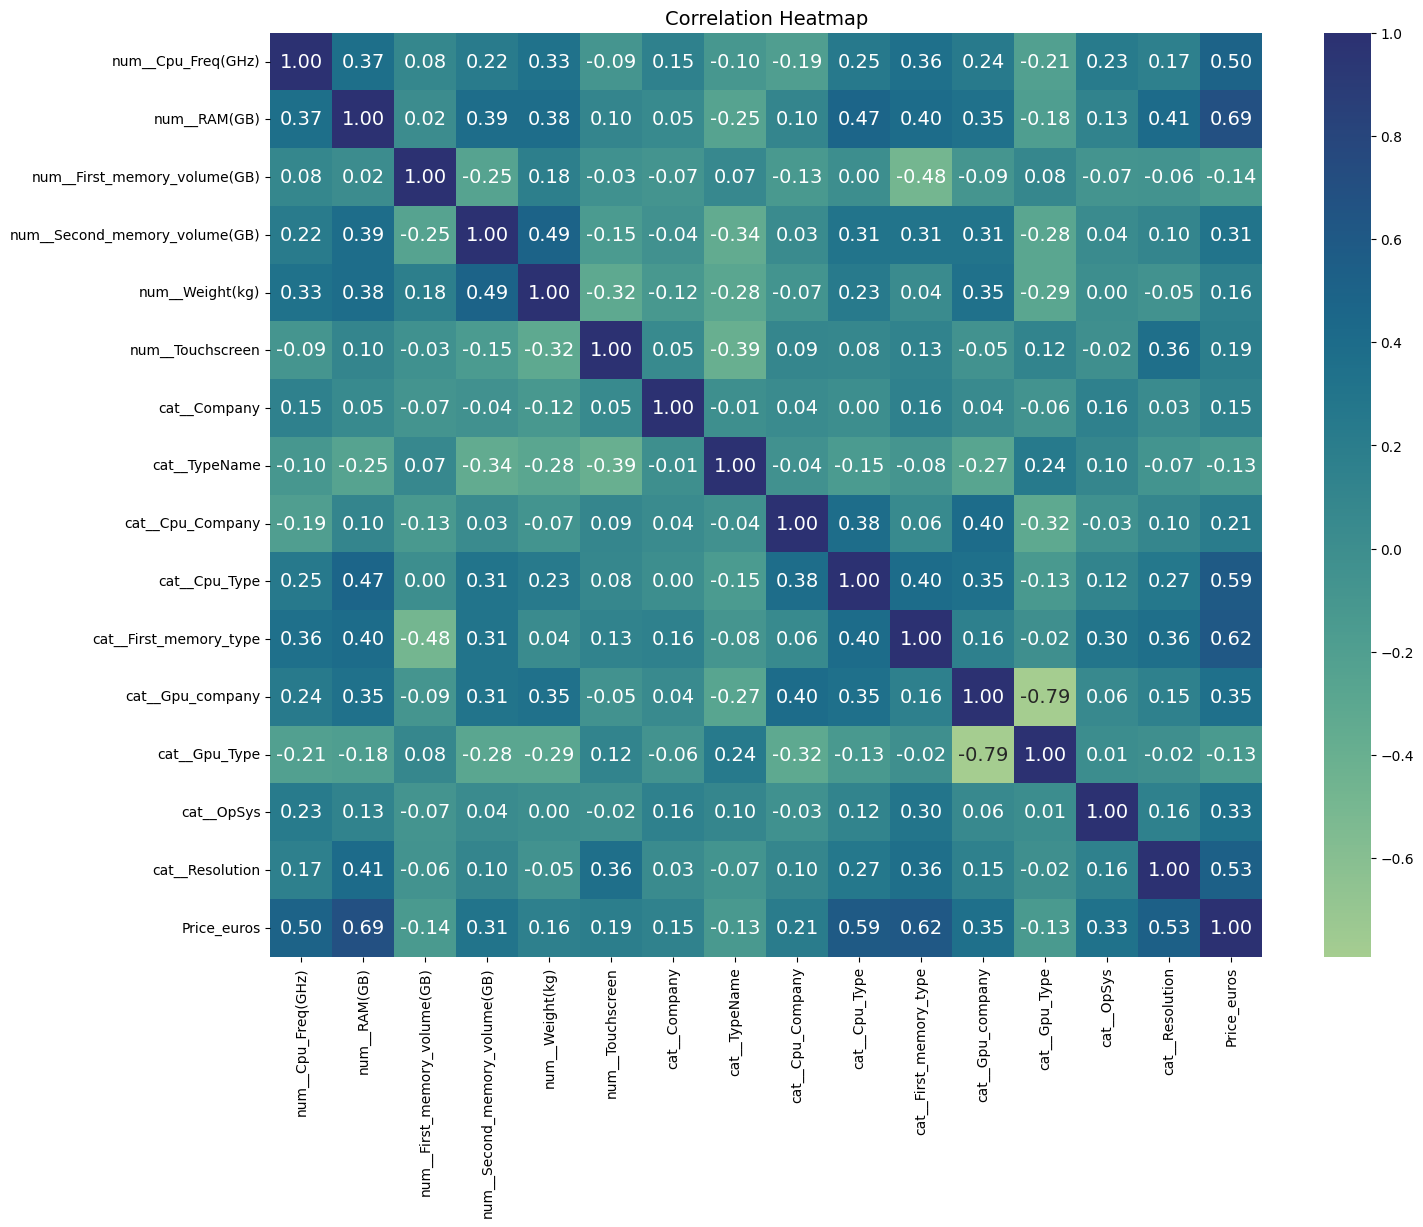

In [72]:
correlation_matrix = x_train_preprocessed_df.corr()

# heatmap to see the relationships.
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Select and train a model

In [73]:
y_train = np.array(y_train).ravel()  # Flattening the target variable

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


-Training

In [75]:
#Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVM ":svm.SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(x_train_preprocessed, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(x_train_preprocessed)
    
    # Calculate RMSE and R2 score on the training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    results[name] = {"RMSE (Train)": rmse_train, "R2 Score (Train)": r2_train}

    # Display results
    print(f"{name}:")
    print(f"  RMSE (Train): {rmse_train:.4f}")
    print(f"  R2 Score (Train): {r2_train:.4f}")
    print("\n")

# Summary
print("Training Set Evaluation Summary:")
for name, metrics in results.items():
    print(f"{name}: RMSE (Train) = {metrics['RMSE (Train)']:.4f}, R2 Score (Train) = {metrics['R2 Score (Train)']:.4f}")


Training Linear Regression...
Linear Regression:
  RMSE (Train): 0.3040
  R2 Score (Train): 0.7630


Training SVM ...
SVM :
  RMSE (Train): 0.1725
  R2 Score (Train): 0.9236


Training Random Forest...
Random Forest:
  RMSE (Train): 0.0790
  R2 Score (Train): 0.9840


Training Set Evaluation Summary:
Linear Regression: RMSE (Train) = 0.3040, R2 Score (Train) = 0.7630
SVM : RMSE (Train) = 0.1725, R2 Score (Train) = 0.9236
Random Forest: RMSE (Train) = 0.0790, R2 Score (Train) = 0.9840


better evaluation using Cross validation


In [76]:
# custom RMSE scorer
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create the scorer object
rmse_scorer_cv = make_scorer(rmse_scorer, greater_is_better=False)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVM ":svm.SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Validating {name}...")
    
    # Cross-validation for RMSE
    cv_rmse = -cross_val_score(
        model, 
        x_train_preprocessed, 
        y_train, 
        scoring=rmse_scorer_cv, 
        cv=10
    ).mean()
    
    # Cross-validation for R2
    cv_r2 = cross_val_score(
        model, 
        x_train_preprocessed, 
        y_train, 
        scoring='r2', 
        cv=10
    ).mean()
    
    # Store results
    results[name] = {
        "RMSE (CV)": cv_rmse,
        "R2 Score (CV)": cv_r2
    }
    
    # Display individual model results
    print(f"{name}:")
    print(f"  RMSE (CV): {cv_rmse:.4f}")
    print(f"  R2 Score (CV): {cv_r2:.4f}")
    print("\n")

# Summary 
print("Evaluation Summary:")
for name, metrics in results.items():
    print(f"{name}: RMSE (CV)= {metrics['RMSE (CV)']:.4f},R2 Score (CV) = {metrics['R2 Score (CV)']:.4f}")

Validating Linear Regression...
Linear Regression:
  RMSE (CV): 0.3092
  R2 Score (CV): 0.7479


Validating SVM ...
SVM :
  RMSE (CV): 0.2287
  R2 Score (CV): 0.8623


Validating Random Forest...
Random Forest:
  RMSE (CV): 0.2110
  R2 Score (CV): 0.8824


Evaluation Summary:
Linear Regression: RMSE (CV)= 0.3092,R2 Score (CV) = 0.7479
SVM : RMSE (CV)= 0.2287,R2 Score (CV) = 0.8623
Random Forest: RMSE (CV)= 0.2110,R2 Score (CV) = 0.8824


Although the random forest has clearly overfit the data we believe it is due to the low number of instances but Based on that and cross validation score, we will be using the random forest regressor hoping for better results on the test set after hyperparameter tuning 

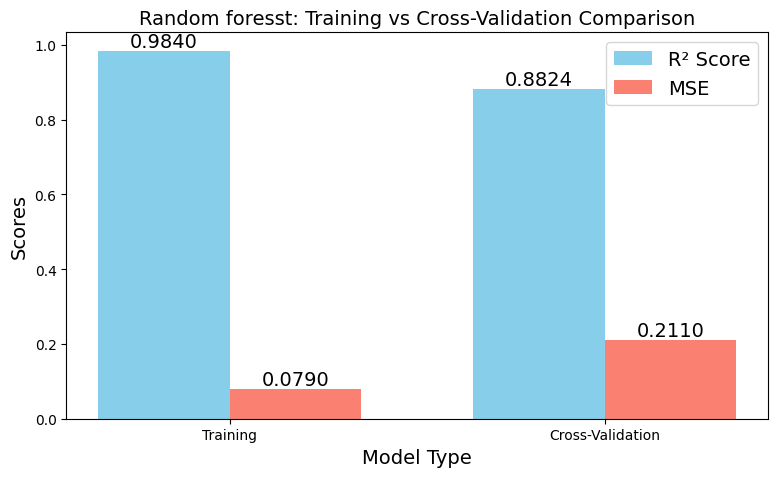

In [77]:
labels = ['Training', 'Cross-Validation']
r2_scores_randomforest = [r2_train, cv_r2 ]
mse_scores_randomforest = [rmse_train, cv_rmse]

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(labels))
width = 0.35
bars_r2_randomforest = ax.bar(x - width / 2, r2_scores_randomforest, width, label='R² Score', color='skyblue')
bars_mse_randomforest = ax.bar(x + width / 2, mse_scores_randomforest, width, label='MSE', color='salmon')

ax.set_xlabel('Model Type')
ax.set_ylabel('Scores')
ax.set_title('Random foresst: Training vs Cross-Validation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}', ha='center', va='bottom')

add_value_labels(bars_r2_randomforest)
add_value_labels(bars_mse_randomforest)

plt.tight_layout()
plt.show()

# hyperparameter tuning



In [78]:

# # # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 400, 500],   # Test more values for the number of trees
#     'max_depth': [None, 10, 20, 30, 40, 50],         # Allow deeper trees
#     'min_samples_split': [2, 5, 10, 15, 20],         # Test more values for minimum splits
#     'min_samples_leaf': [1, 2, 4, 6, 8],             # Allow more flexibility for leaf sizes
#     'bootstrap': [True, False],                      # Both options for bootstrapping
#     'max_features': ['sqrt', 'log2', None] ,
#     'random_state':[1, 42, 72]    
# }
              
# rf = RandomForestRegressor(random_state=42)

# # Use custom scoring for RMSE and R²
# scoring = {
#     'RMSE': 'neg_mean_squared_error',
#     'R2': make_scorer(r2_score)
# }

# # Randomized search
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grid,
#     n_iter=60,
#     scoring=scoring,
#     refit='R2',
#     cv=5,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Perform the random search
# print("Starting hyperparameter tuning...")
# random_search.fit(x_train_preprocessed, y_train)

# # Extract best parameters, RMSE, and R²
# best_params = random_search.best_params_
# best_rmse = np.sqrt(-random_search.cv_results_['mean_test_RMSE'][random_search.best_index_])
# best_r2 = random_search.best_score_

# print("\nBest Hyperparameters:")
# print(best_params)
# print(f"Best RMSE: {best_rmse:.4f}")
# print(f"Best R²: {best_r2:.4f}")

Finalmodel=RandomForestRegressor

In [79]:

# Initialize the model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    bootstrap=False,max_depth=40, min_samples_leaf=1, min_samples_split=5, n_estimators=200,random_state=72,max_features='sqrt',
 )

# Fit the model on the full training dataset
best_rf_model.fit(x_train_preprocessed, y_train)



RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=200, random_state=72)

-Test

In [80]:

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_preprocessed)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test Set Performance: RMSE = {rmse:.4f}, R² = {r2:.4f}")


Test Set Performance: RMSE = 0.1832, R² = 0.9129


After choosing the Random Forest Regression as our final model.
let's predict the price of our first instance :)

In [81]:
best_rf_model.fit(x_train_preprocessed, y_train)

# Create a DataFrame for the single sample
example_df = pd.DataFrame([['Apple', 'Ultrabook', 'Intel', 'Core i5', 2.3, 8, 128.0, 'SSD', 0.0, 
                            'Intel', 'Iris Plus Graphics 640', 'macOS', 1.37, '2560x1600', 0.0]],
                          columns=['Company', 'TypeName', 'Cpu_Company', 'Cpu_Type', 'Cpu_Freq(GHz)', 
                                   'RAM(GB)', 'First_memory_volume(GB)', 'First_memory_type', 'Second_memory_volume(GB)', 
                                   'Gpu_company', 'Gpu_Type', 'OpSys', 'Weight(kg)', 'Resolution', 'Touchscreen'])

# Transform the example
example_preprocessed = preprocessor.transform(example_df)
y_pred = best_rf_model.predict(example_preprocessed)
predicted_price = int(np.exp(y_pred)[0])
print(f"The prdicted price: {predicted_price}$")
print(f"The original price of the laptop:1340")


The prdicted price: 1312$
The original price of the laptop:1340


The offset is only 87$ which is acceptable for a market like the Laptop market!

In [83]:
import joblib  
joblib.dump(model, 'model.pkl')

['model.pkl']

In [84]:
from flask import Flask, request, jsonify
app = Flask(__name__)

# Load the trained model
model = joblib.load('model.pkl')

@app.route('/', methods=['GET'])
def home():
    return "Model API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the data from the POST request
        data = request.get_json(force=True)
        
        # Convert data to DataFrame
        input_data = pd.DataFrame(data['features'])
        
        # Make prediction
        prediction = model.predict(input_data)
        
        return jsonify({
            'status': 'success',
            'prediction': prediction.tolist()
        })
    
    except Exception as e:
        return jsonify({
            'status': 'error',
            'message': str(e)
        })

if __name__ == '__main__':
    port = int(os.environ.get('PORT', 5000))
    app.run(host='0.0.0.0', port=port)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.19:5000
Press CTRL+C to quit


In [ ]:
# from flask import Flask, request, jsonify
# import joblib

# # تحميل الموديل
# model = joblib.load('model.pkl')

# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json
#     prediction = model.predict([data['features']])
#     return jsonify({'prediction': prediction.tolist()})

# if __name__ == '__main__':
#     app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.19:5000
Press CTRL+C to quit
127.0.0.1 - - [23/Dec/2024 21:56:40] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Dec/2024 21:56:40] "GET /favicon.ico HTTP/1.1" 404 -
192.168.1.19 - - [23/Dec/2024 21:56:53] "GET / HTTP/1.1" 404 -
192.168.1.19 - - [23/Dec/2024 21:56:53] "GET /favicon.ico HTTP/1.1" 404 -


In [83]:
import pickle

with open('laptop_price.sav', 'wb') as file:
    pickle.dump({'preproccesor':preprocessor ,'model':best_rf_model}, file)